In [25]:
import pygrib
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
from joblib import load

class WeatherPredictor:
    def __init__(self, model_file):
        self.model = load(model_file)
        self.prediction = None
        self.lats = None
        self.lons = None
        self.time = None
        self.year = None
        self.month = None
        self.day = None

    def extract_data_and_coords(self, filename):
        with pygrib.open(filename) as grbs:
            grb = grbs.select()[0]
            data = grb.values
            self.lats, self.lons = grb.latlons()
            self.time = grb.validDate.strftime("%H:%M")
            self.year = grb.validDate.year
            self.month = grb.validDate.month
            self.day = grb.validDate.day
            return data.flatten()
        
    def make_prediction(self, grib_file):
        X_new = self.extract_data_and_coords(grib_file)
        X_new = X_new.reshape(-1, 1)
        self.prediction = self.model.predict(X_new).reshape(361, 720)

    def output_csv(self, filename='csv_out.csv'):
        output_folder = './output/'
        output_path = os.path.join(output_folder, filename)
        os.makedirs(output_folder, exist_ok=True)
        
        if self.prediction is None:
            print("No prediction made yet. Call the 'make_prediction' method first.")
        else:
            pd.DataFrame(self.prediction.flatten()).to_csv(output_path, index=False)

        return open(output_path)
            

    def plot_geopotential_height(self):
        if self.prediction is None:
            print("No prediction made yet. Call the 'make_prediction' method first.")
        else:
            # Create a plot with a world map using Cartopy
            fig = plt.figure(figsize=(10, 6))
            ax = plt.axes(projection=ccrs.PlateCarree())
            ax.coastlines()
            ax.stock_img()
            ax.gridlines(draw_labels=True)

            # Compute plot min/max and set the contour value range
            vmin = self.prediction.min().item()
            vmax = self.prediction.max().item()
            levels = np.linspace(vmin, vmax, 100)

            # Plot the geopotential height data
            plt.contourf(self.lons, self.lats, self.prediction, levels=levels, transform=ccrs.PlateCarree())

            # Add colorbar
            cbar = plt.colorbar(shrink=0.642,  pad=0.1)
            cbar.set_label('Geopotential Height (meters)')

            # Set plot title and labels
            plt.title(f"500hPa Geopotential Height Zero-Hour Forecast for {self.month}/{self.day}/{self.year} at {self.time}")
            plt.xlabel('Longitude')
            plt.ylabel('Latitude')

            #plt.show()
            
            # Create output folder and set output path
            output_folder = './output/'
            output_filename = "zero_hour_plot.png"
            output_path = os.path.join(output_folder, output_filename)
            os.makedirs(output_folder, exist_ok=True)
            
            # Save and return plot
            plt.savefig(output_path)
            return open(output_path)


<_io.TextIOWrapper name='./output/csv_out.csv' mode='r' encoding='UTF-8'>
<_io.TextIOWrapper name='./output/zero_hour_plot.png' mode='r' encoding='UTF-8'>


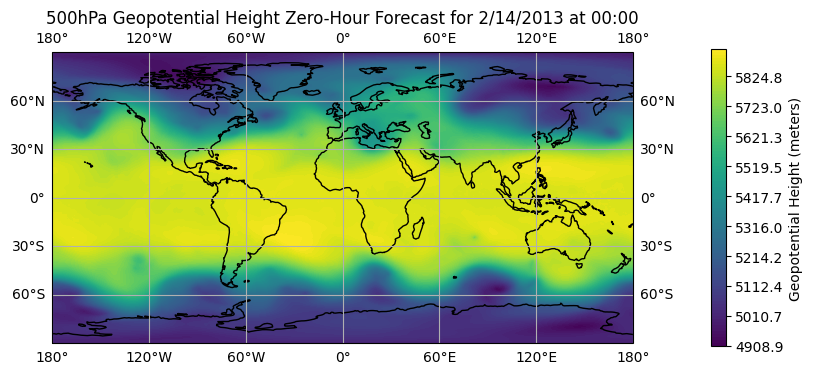

In [ ]:
## Example usage: 
predictor = WeatherPredictor('regr_model.joblib')
predictor.make_prediction('../model-testing/new-twelve')
print(predictor.output_csv()) #outputs CSV with filename as input
print(predictor.plot_geopotential_height()) #plots the prediction 


In [19]:
import pygrib
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs

def plot_grib_data(grib_file):
    with pygrib.open(grib_file) as grbs:
        grb = grbs.select()[0]
        data = grb.values
        lats, lons = grb.latlons()

        # Create a plot with a world map using Cartopy
        fig = plt.figure(figsize=(10, 6))
        ax = plt.axes(projection=ccrs.PlateCarree())
        ax.coastlines()
        ax.stock_img()
        ax.gridlines(draw_labels=True)

        # Compute plot min/max and set the contour value range
        vmin = data.min().item()
        vmax = data.max().item()
        levels = np.linspace(vmin, vmax, 100)

        # Plot the geopotential height data
        plt.contourf(lons, lats, data, levels=levels, transform=ccrs.PlateCarree())

        # Add colorbar
        cbar = plt.colorbar(shrink=0.642, pad=0.1)
        cbar.set_label('Geopotential Height (meters)')

        # Set plot title and labels
        plt.title('Geopotential Height from GRIB File')
        plt.xlabel('Longitude')
        plt.ylabel('Latitude')

        plt.show()


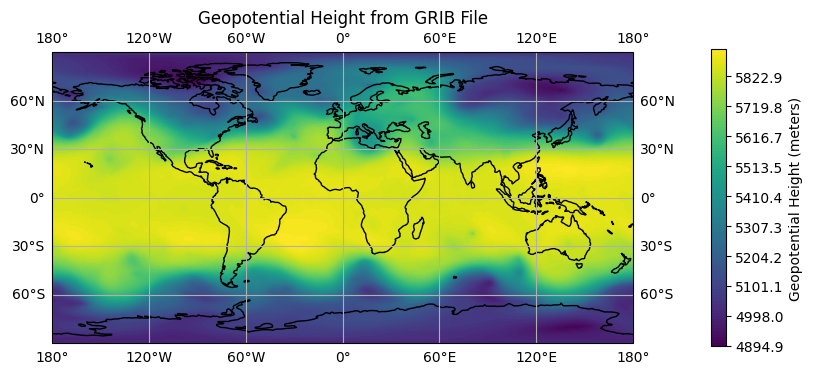

In [ ]:
plot_grib_data("../model-testing/new-zero")